# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
cancer_data <- read.csv("./datos/BCSC_risk_factors_summarized.csv")
#head(cancer_data)
cancer_data <- cancer_data[rep(row.names(cancer_data), cancer_data$count), 1:12]
head(cancer_data)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
1,2000,1,1,0,0,0,1,0,1,3,0,0
2,2000,1,1,0,0,1,3,0,1,2,0,0
3,2000,1,1,0,0,1,4,0,1,1,0,0
3.1,2000,1,1,0,0,1,4,0,1,1,0,0
4,2000,1,1,0,0,2,3,0,1,1,0,0
5,2000,1,1,0,0,2,3,0,1,1,1,9


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
cancer_data=cancer_data[sample(length(cancer_data$biophx),5000),]

In [3]:
head(cancer_data)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [4]:
for(i in 1:length(cancer_data$year)){
    for(j in 3:length(cancer_data)){
        if (cancer_data[i,j]==9){
            cancer_data[i,j]=NA
        }
    }
}
head(cancer_data)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
792997.89,2006,8,NA,NA,NA,NA,2,NA,2,NA,0,0
986739.194,2008,7,2,0,NA,NA,2,0,2,NA,0,0
845393.799,2007,5,1,0,NA,NA,2,0,1,NA,0,0
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0
481428.71,2004,3,1,0,NA,NA,3,0,1,2,0,0
169906.1,2001,6,5,0,NA,NA,1,1,2,3,0,0


#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [5]:
e_a=cancer_data
for (i in 1:length(cancer_data$age_group_5_years)){
    if(cancer_data$age_group_5_years[i]==1){
       e_a$age_group_5_years[i]="18-29" 
    } else 
    if(cancer_data$age_group_5_years[i]==2){
        e_a$age_group_5_years[i]="30-34"
    } else 
    if(cancer_data$age_group_5_years[i]==3){
        e_a$age_group_5_years[i]="35-39"
    } else 
    if(cancer_data$age_group_5_years[i]==4){
        e_a$age_group_5_years[i]="40-44"
    } else 
    if(cancer_data$age_group_5_years[i]==5){
        e_a$age_group_5_years[i]="45-49"
    } else 
    if(cancer_data$age_group_5_years[i]==6){
        e_a$age_group_5_years[i]="50-54"
    } else 
    if(cancer_data$age_group_5_years[i]==7){
        e_a$age_group_5_years[i]="55-59"
    } else 
    if(cancer_data$age_group_5_years[i]==8){
        e_a$age_group_5_years[i]="60-64"
    } else 
    if(cancer_data$age_group_5_years[i]==9){
        e_a$age_group_5_years[i]="65-69"
    } else 
    if(cancer_data$age_group_5_years[i]==10){
        e_a$age_group_5_years[i]="70-74"
    } else 
    if(cancer_data$age_group_5_years[i]==11){
        e_a$age_group_5_years[i]="75-79"
    } else 
    if(cancer_data$age_group_5_years[i]==12){
        e_a$age_group_5_years[i]="80-84"
    } else 
    if(cancer_data$age_group_5_years[i]==13){
        e_a$age_group_5_years[i]=">=85"
    }
}
e_a_=data.frame(age_group_5_years=e_a$age_group_5_years,first_degree_hx=e_a$first_degree_hx)
head(e_a_)
#1 = Edad 18-29; 2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 
#8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85

age_group_5_years,first_degree_hx
60-64,NA
55-59,0
45-49,0
60-64,1
35-39,0
50-54,0


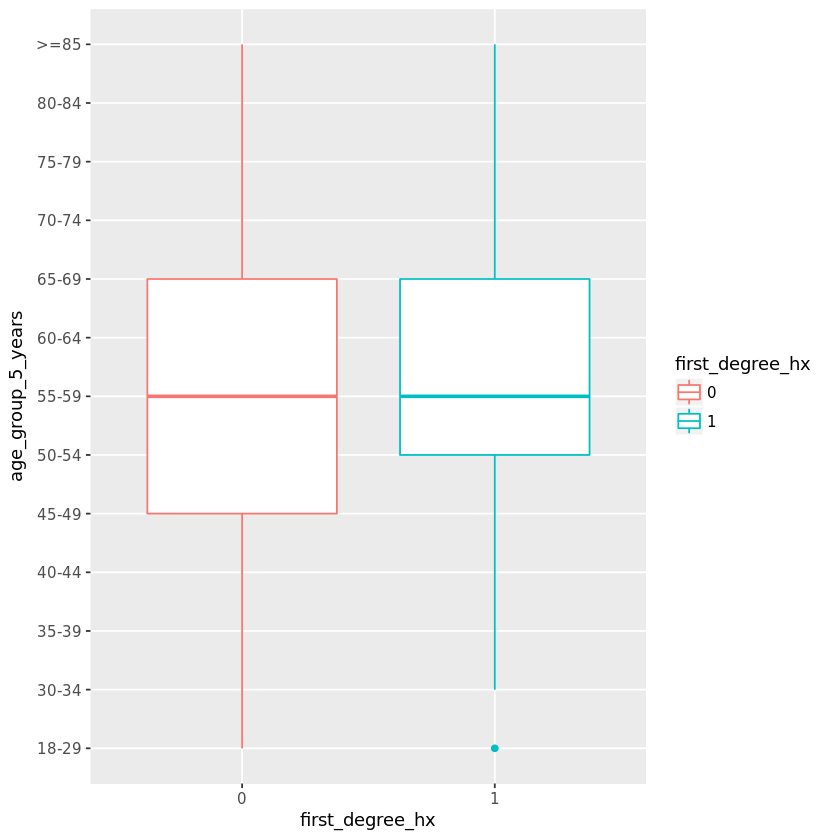

In [6]:
library(ggplot2)
e_a_=na.omit(e_a_)
e_a_$age_group_5_years=factor(e_a_$age_group_5_years)
e_a_$first_degree_hx=factor(e_a_$first_degree_hx)
ggplot(e_a_,aes(x=first_degree_hx,y=age_group_5_years,group=first_degree_hx,color=first_degree_hx,na.exclude=TRUE))+
      geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [7]:
e_a_e=na.omit(data.frame(age_group_5_years=cancer_data$age_group_5_years,first_degree_hx=cancer_data$first_degree_hx))
e_a_e$age_group_5_years=factor(e_a_e$age_group_5_years)
e_a_e$age_group_5_years=factor(e_a_e$age_group_5_years)
head(e_a_e)

,age_group_5_years,first_degree_hx
2,7,0
3,5,0
4,8,1
5,3,0
6,6,0
7,10,0


In [8]:
t.test

function (x, ...) 
UseMethod("t.test")
<bytecode: 0x2971e48>
<environment: namespace:stats>

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

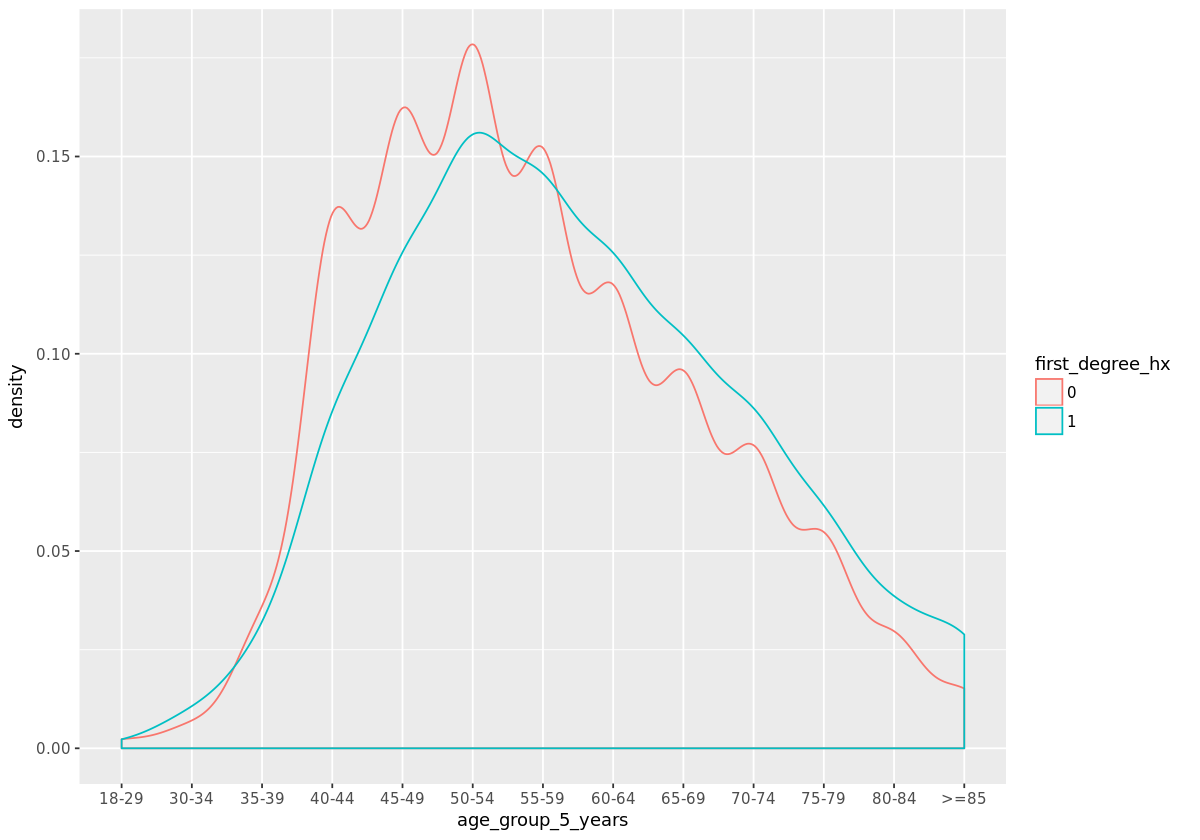

In [9]:
options(repr.plot.height=7,repr.plot.width=10)
ggplot(e_a_,aes(x=age_group_5_years,group=first_degree_hx,color=first_degree_hx))+geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

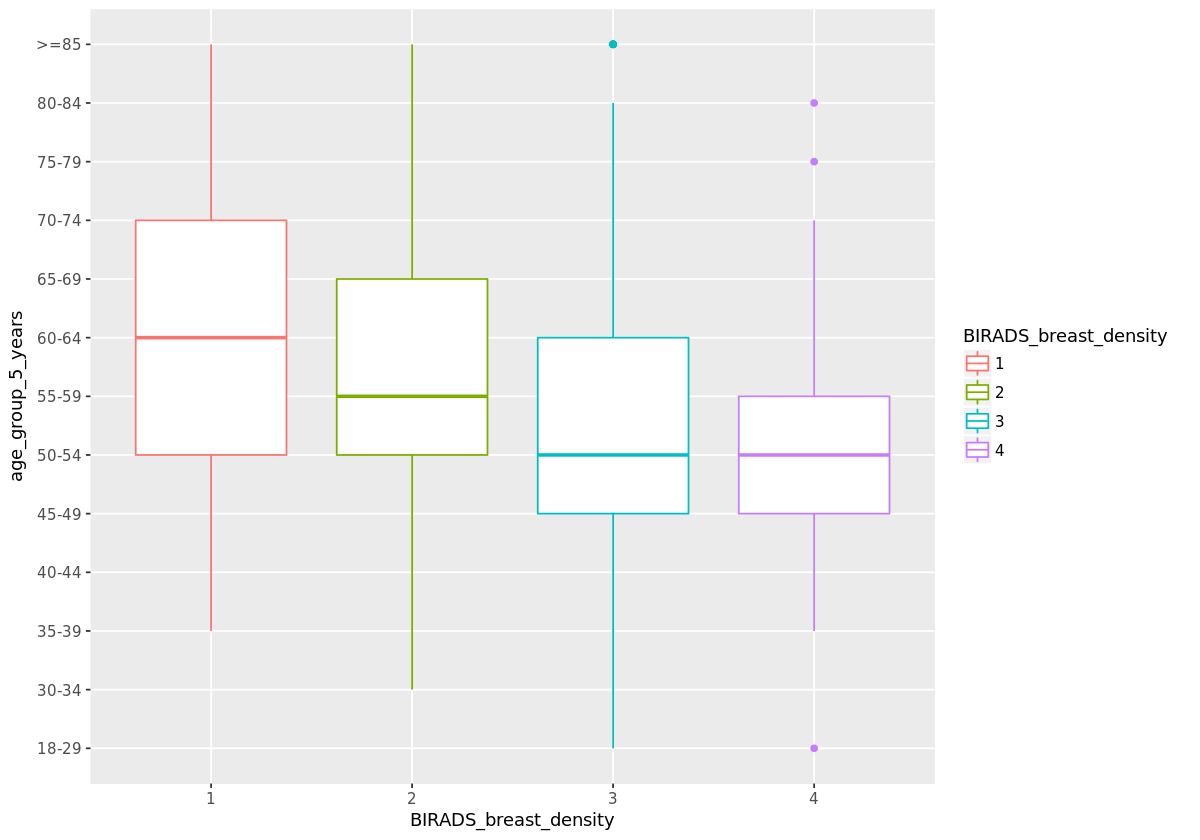

In [10]:
e_b=na.omit(e_a)
e_b$BIRADS_breast_density=factor(e_b$BIRADS_breast_density)
ggplot(e_b,aes(x=BIRADS_breast_density,y=age_group_5_years, group=BIRADS_breast_density,color=BIRADS_breast_density))+
       geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [11]:
cancer_d=na.omit(cancer_data)
cor(cancer_d$BIRADS_breast_density,cancer_d$age_group_5_years)

[1] -0.2393438

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [15]:
#length(cancer_data$BIRADS_breast_density)
birads=data.frame(BBD=cancer_data$BIRADS_breast_density,age_group_5_years=cancer_data$age_group_5_years)
birads=na.omit(birads)
m=data.frame(table(birads$BBD))
m

Var1,Freq
1,297
2,1665
3,1451
4,256


In [14]:
print("A vista de las frecuencias, no todos los BIRADS son igual de probables")

[1] "A vista de las frecuencias, no todos los BIRADS son igual de probables"


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [16]:
print("el que tiene más frecuencia es el de tipo 2, con una proporcion de:",m[2,2]/sum(m$Freq))

[1] "el que tiene m<U+00E1>s frecuencia es el de tipo 2, con una proporcion de:"


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

¿Depende el tipo de cancer BIRADS del grupo étnico?

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA